In [19]:
!pip install torchinfo tqdm torch

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 56.7 MB/s  0:00:13m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 71.0 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 62.0 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 25.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 60.1 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 68.5 MB

In [1]:
import pandas as pd
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load packages
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
# N, D = X_train.shape
from datetime import date

In [2]:
df = pd.read_csv('data/etf/jan2025/cleaned/spy_cleaned_jan2025.csv',engine="pyarrow",sep = ',')
df["Date-Time"] = pd.to_datetime(df["Date-Time"])


In [3]:
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")

In [4]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,SPY,2025-01-03 09:40:00.004164460-05:00,0.000068,0.04,589.420,589.40,22.0,589.44,120.0,589.39,...,589.12,50.0,589.91,100.0,-0.000051,-0.000017,0.000161,1,0,2
1,SPY,2025-01-03 09:40:00.009215191-05:00,0.000068,0.04,589.420,589.40,23.0,589.44,120.0,589.39,...,589.12,50.0,589.91,100.0,-0.000059,-0.000017,0.000161,1,0,2
2,SPY,2025-01-03 09:40:00.014244689-05:00,0.000068,0.04,589.420,589.40,23.0,589.44,120.0,589.39,...,589.23,200.0,589.91,100.0,-0.000059,-0.000017,0.000161,1,0,2
3,SPY,2025-01-03 09:40:00.015151020-05:00,0.000068,0.04,589.420,589.40,23.0,589.44,120.0,589.39,...,589.12,50.0,589.91,100.0,-0.000076,0.000000,0.000170,1,0,2
4,SPY,2025-01-03 09:40:00.019311187-05:00,0.000068,0.04,589.420,589.40,23.0,589.44,120.0,589.39,...,589.20,100.0,590.03,50.0,-0.000076,0.000000,0.000161,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933763,SPY,2025-01-31 15:49:52.799665941-05:00,0.000083,0.05,602.455,602.43,500.0,602.48,220.0,602.42,...,602.16,50.0,602.69,50.0,0.000008,0.000083,0.000041,0,2,2
7933764,SPY,2025-01-31 15:49:52.899202991-05:00,0.000083,0.05,602.455,602.43,570.0,602.48,120.0,602.42,...,602.16,50.0,602.69,50.0,0.000000,0.000083,0.000041,0,2,2
7933765,SPY,2025-01-31 15:49:52.944239230-05:00,0.000083,0.05,602.435,602.41,100.0,602.46,500.0,602.40,...,602.16,50.0,602.68,100.0,0.000025,0.000116,0.000075,0,2,2
7933766,SPY,2025-01-31 15:49:52.953968404-05:00,0.000116,0.07,602.445,602.41,600.0,602.48,220.0,602.40,...,602.16,50.0,602.69,50.0,0.000017,0.000091,0.000058,0,2,2


In [5]:
# ---- select columns to normalize: all L1–L10 Bid/Ask Price and Size ----
price_cols = [f"L{i}-BidPrice" for i in range(1, 11)] + [f"L{i}-AskPrice" for i in range(1, 11)]
size_cols  = [f"L{i}-BidSize"  for i in range(1, 11)] + [f"L{i}-AskSize"  for i in range(1, 11)]
cols_to_normalize = price_cols + size_cols

# ---- apply z-score normalization ----
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])



In [6]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,SPY,2025-01-03 09:40:00.004164460-05:00,0.000068,0.04,589.420,-0.454133,-1.091858,-0.454909,-0.860756,-0.453594,...,-0.434406,-0.423778,-0.469248,-0.419168,-0.000051,-0.000017,0.000161,1,0,2
1,SPY,2025-01-03 09:40:00.009215191-05:00,0.000068,0.04,589.420,-0.454133,-1.088373,-0.454909,-0.860756,-0.453594,...,-0.434406,-0.423778,-0.469248,-0.419168,-0.000059,-0.000017,0.000161,1,0,2
2,SPY,2025-01-03 09:40:00.014244689-05:00,0.000068,0.04,589.420,-0.454133,-1.088373,-0.454909,-0.860756,-0.453594,...,-0.422315,-0.191426,-0.469248,-0.419168,-0.000059,-0.000017,0.000161,1,0,2
3,SPY,2025-01-03 09:40:00.015151020-05:00,0.000068,0.04,589.420,-0.454133,-1.088373,-0.454909,-0.860756,-0.453594,...,-0.434406,-0.423778,-0.469248,-0.419168,-0.000076,0.000000,0.000170,1,0,2
4,SPY,2025-01-03 09:40:00.019311187-05:00,0.000068,0.04,589.420,-0.454133,-1.088373,-0.454909,-0.860756,-0.453594,...,-0.425613,-0.346327,-0.455822,-0.484916,-0.000076,0.000000,0.000161,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933763,SPY,2025-01-31 15:49:52.799665941-05:00,0.000083,0.05,602.455,0.989036,0.574091,0.989959,-0.514197,0.989494,...,0.998925,-0.423778,0.960694,-0.484916,0.000008,0.000083,0.000041,0,2,2
7933764,SPY,2025-01-31 15:49:52.899202991-05:00,0.000083,0.05,602.455,0.989036,0.818058,0.989959,-0.860756,0.989494,...,0.998925,-0.423778,0.960694,-0.484916,0.000000,0.000083,0.000041,0,2,2
7933765,SPY,2025-01-31 15:49:52.944239230-05:00,0.000083,0.05,602.435,0.986821,-0.820008,0.987743,0.456167,0.987279,...,0.998925,-0.423778,0.959575,-0.419168,0.000025,0.000116,0.000075,0,2,2
7933766,SPY,2025-01-31 15:49:52.953968404-05:00,0.000116,0.07,602.445,0.986821,0.922616,0.989959,-0.514197,0.987279,...,0.998925,-0.423778,0.960694,-0.484916,0.000017,0.000091,0.000058,0,2,2


In [13]:
target_cols = [f"Target_{i}"  for i in [10,50,100]]
target_cols

['Target_10', 'Target_50', 'Target_100']

In [8]:
df[price_cols + size_cols+target_cols]

,L1-BidPrice,L2-BidPrice,L3-BidPrice,L4-BidPrice,L5-BidPrice,L6-BidPrice,L7-BidPrice,L8-BidPrice,L9-BidPrice,L10-BidPrice,...,L4-AskSize,L5-AskSize,L6-AskSize,L7-AskSize,L8-AskSize,L9-AskSize,L10-AskSize,Target_10,Target_50,Target_100
0,-0.454133,-0.453594,-0.452716,-0.450674,-0.446979,-0.441854,-0.438123,-0.433850,-0.427638,-0.434406,...,0.092940,0.375767,0.354008,0.328244,-0.251519,-0.413877,-0.419168,1,0,2
1,-0.454133,-0.453594,-0.452716,-0.451781,-0.448085,-0.445169,-0.441434,-0.436055,-0.432043,-0.434406,...,0.092940,0.375767,-0.122204,0.328244,-0.251519,-0.413877,-0.419168,1,0,2
2,-0.454133,-0.453594,-0.452716,-0.450674,-0.446979,-0.441854,-0.438123,-0.433850,-0.427638,-0.422315,...,0.092940,0.375767,0.354008,0.328244,-0.251519,-0.413877,-0.419168,1,0,2
3,-0.454133,-0.453594,-0.452716,-0.450674,-0.446979,-0.441854,-0.438123,-0.433850,-0.427638,-0.434406,...,0.092940,0.375767,0.354008,0.328244,-0.251519,-0.413877,-0.419168,1,0,2
4,-0.454133,-0.453594,-0.452716,-0.450674,-0.446979,-0.441854,-0.438123,-0.433850,-0.427638,-0.425613,...,0.092940,0.375767,0.592114,-0.182079,-0.366458,-0.330814,-0.484916,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933763,0.989036,0.989494,0.990172,0.988315,0.984262,0.985690,0.989004,0.994024,0.997350,0.998925,...,-0.480082,-0.042023,-0.360310,-0.352187,-0.251519,-0.330814,-0.484916,0,2,2
7933764,0.989036,0.989494,0.990172,0.988315,0.984262,0.985690,0.989004,0.994024,0.997350,0.998925,...,-0.480082,-0.042023,-0.360310,-0.352187,-0.251519,-0.330814,-0.484916,0,2,2
7933765,0.986821,0.987279,0.986850,0.988315,0.984262,0.985690,0.989004,0.994024,0.997350,0.998925,...,0.621884,-0.303142,-0.026962,-0.352187,-0.366458,-0.330814,-0.419168,0,2,2
7933766,0.986821,0.987279,0.986850,0.988315,0.984262,0.985690,0.989004,0.994024,0.997350,0.998925,...,-0.480082,-0.042023,-0.360310,-0.352187,-0.251519,-0.330814,-0.484916,0,2,2


In [7]:
def prepare_x(data):
    df1 = data[:, :40]
    return np.array(df1)

def get_label(data):
    lob = data[:, -3:]
    return lob

def data_classification(X, Y, T):
    [N, D] = X.shape
    df = np.array(X)

    dY = np.array(Y)

    dataY = dY[T - 1:N]

    dataX = np.zeros((N - T + 1, T, D))
    for i in range(T, N + 1):
        dataX[i - T] = df[i - T:i, :]

    return dataX, dataY

def torch_data(x, y):
    x = torch.from_numpy(x)
    x = torch.unsqueeze(x, 1)
    y = torch.from_numpy(y)
    y = F.one_hot(y, num_classes=3)
    return x, y

In [8]:
class Dataset(data.Dataset):
    """Characterizes a dataset for PyTorch"""
    def __init__(self, data, k, num_classes, T):
        """Initialization"""
        self.k = k
        self.num_classes = num_classes
        self.T = T

        x = prepare_x(data)
        y = get_label(data)
        x, y = data_classification(x, y, self.T)
        y = y[:,self.k]
        self.length = len(x)

        x = torch.from_numpy(x)
        self.x = torch.unsqueeze(x, 1)
        self.y = torch.from_numpy(y)

    def __len__(self):
        """Denotes the total number of samples"""
        return self.length

    def __getitem__(self, index):
        """Generates samples of data"""
        return self.x[index], self.y[index]

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [10]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
df.groupby(["Date"]).size()

Date
2025-01-03    390477
2025-01-06    426714
2025-01-07    666371
2025-01-08    580787
2025-01-10    610360
2025-01-13    591691
2025-01-14    555100
2025-01-15    373710
2025-01-16    510368
2025-01-17    343284
2025-01-21    389220
2025-01-22    209006
2025-01-23    150351
2025-01-24    207134
2025-01-27    522697
2025-01-28    310053
2025-01-29    406570
2025-01-30    315562
2025-01-31    374313
dtype: int64

In [11]:

df_train = df[(df["Date"] >= date(2025, 1, 3)) & (df["Date"] <= date(2025, 1, 10))]
df_val = df[(df["Date"] >= date(2025, 1, 25)) & (df["Date"] <= date(2025, 1, 27))]
df_test = df[(df["Date"] >= date(2025, 1, 28)) & (df["Date"] <= date(2025, 1, 31))]

In [14]:
df_train = df_train[price_cols + size_cols+target_cols]
df_test =  df_test[price_cols + size_cols+target_cols]
df_val = df_val[price_cols + size_cols+target_cols]

In [ ]:
y[:,self.k]

In [84]:
df_test.to_numpy()[:, -3:]

array([[0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       ...,
       [2., 2., 2.],
       [2., 0., 2.],
       [0., 2., 2.]], shape=(31027, 3))

In [73]:
prepare_x(df_train.to_numpy())
get_label(df_train.to_numpy())

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], shape=(57077, 3))

In [ ]:
prepare_x(df_train.to_numpy())

In [ ]:
batch_size = 64

dataset_train = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_val = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_test = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False)

print(dataset_train.x.shape, dataset_train.y.shape)

In [86]:
class deeplob(nn.Module):
    def __init__(self, y_len):
        super().__init__()
        self.y_len = y_len

        # convolution blocks
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.LeakyReLU(negative_slope=0.01),
#             nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,10)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )

        # inception moduels
        self.inp1 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(5,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp3 = nn.Sequential(
            nn.MaxPool2d((3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )

        # lstm layers
        self.lstm = nn.LSTM(input_size=192, hidden_size=64, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(64, self.y_len)

    def forward(self, x):
        # h0: (number of hidden layers, batch size, hidden size)
        h0 = torch.zeros(1, x.size(0), 64).to(device)
        c0 = torch.zeros(1, x.size(0), 64).to(device)

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        x_inp1 = self.inp1(x)
        x_inp2 = self.inp2(x)
        x_inp3 = self.inp3(x)

        x = torch.cat((x_inp1, x_inp2, x_inp3), dim=1)

#         x = torch.transpose(x, 1, 2)
        x = x.permute(0, 2, 1, 3)
        x = torch.reshape(x, (-1, x.shape[1], x.shape[2]))

        x, _ = self.lstm(x, (h0, c0))
        x = x[:, -1, :]
        x = self.fc1(x)
        forecast_y = torch.softmax(x, dim=1)

        return forecast_y

In [100]:
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)

deeplob(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride

In [101]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [102]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):

    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    best_test_loss = np.inf
    best_test_epoch = 0

    for it in tqdm(range(epochs)):

        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # move data to GPU
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            # print("inputs.shape:", inputs.shape)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            # print("about to get model output")
            outputs = model(inputs)
            # print("done getting model output")
            # print("outputs.shape:", outputs.shape, "targets.shape:", targets.shape)
            loss = criterion(outputs, targets)
            # Backward and optimize
            # print("about to optimize")
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        # Get train loss and test loss
        train_loss = np.mean(train_loss) # a little misleading

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        if test_loss < best_test_loss:
            torch.save(model.state_dict(), './best_val_model_pytorch.pt')
            best_test_loss = test_loss
            best_test_epoch = it
            print('model saved')

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Validation Loss: {test_loss:.4f}, Duration: {dt}, Best Val Epoch: {best_test_epoch}')

    return train_losses, test_losses

In [103]:
train_losses, val_losses = batch_gd(model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:08<06:45,  8.29s/it]

model saved
Epoch 1/50, Train Loss: 1.0439,           Validation Loss: 0.9748, Duration: 0:00:08.284911, Best Val Epoch: 0


  4%|▍         | 2/50 [00:18<07:22,  9.22s/it]

model saved
Epoch 2/50, Train Loss: 0.9527,           Validation Loss: 0.9095, Duration: 0:00:09.865478, Best Val Epoch: 1


  6%|▌         | 3/50 [00:28<07:28,  9.53s/it]

model saved
Epoch 3/50, Train Loss: 0.9047,           Validation Loss: 0.8588, Duration: 0:00:09.910147, Best Val Epoch: 2


  8%|▊         | 4/50 [00:36<06:55,  9.04s/it]

Epoch 4/50, Train Loss: 0.8763,           Validation Loss: 0.9062, Duration: 0:00:08.278514, Best Val Epoch: 2


 10%|█         | 5/50 [00:44<06:32,  8.73s/it]

Epoch 5/50, Train Loss: 0.8706,           Validation Loss: 0.8954, Duration: 0:00:08.180168, Best Val Epoch: 2


 12%|█▏        | 6/50 [00:53<06:29,  8.86s/it]

model saved
Epoch 6/50, Train Loss: 0.8435,           Validation Loss: 0.8351, Duration: 0:00:09.112338, Best Val Epoch: 5


 14%|█▍        | 7/50 [01:04<06:49,  9.52s/it]

model saved
Epoch 7/50, Train Loss: 0.8192,           Validation Loss: 0.8266, Duration: 0:00:10.877500, Best Val Epoch: 6


 16%|█▌        | 8/50 [01:13<06:32,  9.34s/it]

model saved
Epoch 8/50, Train Loss: 0.8113,           Validation Loss: 0.7839, Duration: 0:00:08.966406, Best Val Epoch: 7


 18%|█▊        | 9/50 [01:22<06:13,  9.12s/it]

Epoch 9/50, Train Loss: 0.8528,           Validation Loss: 0.8281, Duration: 0:00:08.612307, Best Val Epoch: 7


 20%|██        | 10/50 [01:32<06:15,  9.39s/it]

model saved
Epoch 10/50, Train Loss: 0.8048,           Validation Loss: 0.7828, Duration: 0:00:10.014187, Best Val Epoch: 9


 22%|██▏       | 11/50 [01:42<06:15,  9.62s/it]

Epoch 11/50, Train Loss: 0.8384,           Validation Loss: 0.8462, Duration: 0:00:10.130572, Best Val Epoch: 9


 24%|██▍       | 12/50 [01:50<05:48,  9.16s/it]

Epoch 12/50, Train Loss: 0.8845,           Validation Loss: 0.8797, Duration: 0:00:08.112108, Best Val Epoch: 9


 26%|██▌       | 13/50 [01:59<05:34,  9.04s/it]

model saved
Epoch 13/50, Train Loss: 0.8169,           Validation Loss: 0.7774, Duration: 0:00:08.750696, Best Val Epoch: 12


 28%|██▊       | 14/50 [02:09<05:39,  9.43s/it]

model saved
Epoch 14/50, Train Loss: 0.7776,           Validation Loss: 0.7471, Duration: 0:00:10.350487, Best Val Epoch: 13


 30%|███       | 15/50 [02:18<05:28,  9.39s/it]

Epoch 15/50, Train Loss: 0.8375,           Validation Loss: 0.7998, Duration: 0:00:09.299890, Best Val Epoch: 13


 32%|███▏      | 16/50 [02:29<05:30,  9.72s/it]

Epoch 16/50, Train Loss: 0.7908,           Validation Loss: 0.7545, Duration: 0:00:10.461675, Best Val Epoch: 13


 34%|███▍      | 17/50 [02:39<05:22,  9.79s/it]

Epoch 17/50, Train Loss: 0.8567,           Validation Loss: 0.8670, Duration: 0:00:09.954434, Best Val Epoch: 13


 36%|███▌      | 18/50 [02:48<05:09,  9.69s/it]

Epoch 18/50, Train Loss: 0.8491,           Validation Loss: 0.7665, Duration: 0:00:09.447731, Best Val Epoch: 13


 38%|███▊      | 19/50 [02:57<04:52,  9.44s/it]

Epoch 19/50, Train Loss: 0.7776,           Validation Loss: 0.7775, Duration: 0:00:08.859219, Best Val Epoch: 13


 40%|████      | 20/50 [03:06<04:43,  9.45s/it]

model saved
Epoch 20/50, Train Loss: 0.7591,           Validation Loss: 0.7293, Duration: 0:00:09.466933, Best Val Epoch: 19


 42%|████▏     | 21/50 [03:14<04:17,  8.89s/it]

Epoch 21/50, Train Loss: 0.7753,           Validation Loss: 0.7460, Duration: 0:00:07.588475, Best Val Epoch: 19


 44%|████▍     | 22/50 [03:24<04:16,  9.16s/it]

Epoch 22/50, Train Loss: 0.7521,           Validation Loss: 0.7622, Duration: 0:00:09.782715, Best Val Epoch: 19


 46%|████▌     | 23/50 [03:35<04:24,  9.80s/it]

model saved
Epoch 23/50, Train Loss: 0.7556,           Validation Loss: 0.7174, Duration: 0:00:11.287932, Best Val Epoch: 22


 48%|████▊     | 24/50 [03:45<04:15,  9.83s/it]

Epoch 24/50, Train Loss: 0.7728,           Validation Loss: 0.7321, Duration: 0:00:09.908438, Best Val Epoch: 22


 50%|█████     | 25/50 [03:55<04:08,  9.94s/it]

model saved
Epoch 25/50, Train Loss: 0.7360,           Validation Loss: 0.7154, Duration: 0:00:10.190550, Best Val Epoch: 24


 52%|█████▏    | 26/50 [04:04<03:52,  9.68s/it]

Epoch 26/50, Train Loss: 0.7328,           Validation Loss: 0.7246, Duration: 0:00:09.082037, Best Val Epoch: 24


 54%|█████▍    | 27/50 [04:13<03:37,  9.47s/it]

model saved
Epoch 27/50, Train Loss: 0.7532,           Validation Loss: 0.7071, Duration: 0:00:08.984127, Best Val Epoch: 26


 56%|█████▌    | 28/50 [04:22<03:25,  9.34s/it]

Epoch 28/50, Train Loss: 0.7399,           Validation Loss: 0.7166, Duration: 0:00:09.025397, Best Val Epoch: 26


 58%|█████▊    | 29/50 [04:32<03:16,  9.36s/it]

model saved
Epoch 29/50, Train Loss: 0.7220,           Validation Loss: 0.7009, Duration: 0:00:09.423086, Best Val Epoch: 28


 60%|██████    | 30/50 [04:42<03:15,  9.76s/it]

Epoch 30/50, Train Loss: 0.7282,           Validation Loss: 0.7102, Duration: 0:00:10.672110, Best Val Epoch: 28


 62%|██████▏   | 31/50 [04:53<03:08,  9.91s/it]

Epoch 31/50, Train Loss: 0.7663,           Validation Loss: 0.7213, Duration: 0:00:10.274465, Best Val Epoch: 28


 64%|██████▍   | 32/50 [05:02<02:53,  9.62s/it]

Epoch 32/50, Train Loss: 0.7315,           Validation Loss: 0.7055, Duration: 0:00:08.943043, Best Val Epoch: 28


 66%|██████▌   | 33/50 [05:13<02:50, 10.05s/it]

model saved
Epoch 33/50, Train Loss: 0.7203,           Validation Loss: 0.6980, Duration: 0:00:11.042741, Best Val Epoch: 32


 68%|██████▊   | 34/50 [05:23<02:39, 10.00s/it]

Epoch 34/50, Train Loss: 0.7134,           Validation Loss: 0.7057, Duration: 0:00:09.883661, Best Val Epoch: 32


 70%|███████   | 35/50 [05:33<02:30, 10.06s/it]

model saved
Epoch 35/50, Train Loss: 0.7122,           Validation Loss: 0.6936, Duration: 0:00:10.210786, Best Val Epoch: 34


 72%|███████▏  | 36/50 [05:41<02:13,  9.51s/it]

model saved
Epoch 36/50, Train Loss: 0.7108,           Validation Loss: 0.6841, Duration: 0:00:08.208152, Best Val Epoch: 35


 74%|███████▍  | 37/50 [05:48<01:52,  8.65s/it]

Epoch 37/50, Train Loss: 0.7207,           Validation Loss: 0.6846, Duration: 0:00:06.663998, Best Val Epoch: 35


 76%|███████▌  | 38/50 [05:57<01:47,  8.93s/it]

Epoch 38/50, Train Loss: 0.6933,           Validation Loss: 0.6854, Duration: 0:00:09.570457, Best Val Epoch: 35


 78%|███████▊  | 39/50 [06:07<01:41,  9.26s/it]

Epoch 39/50, Train Loss: 0.7049,           Validation Loss: 0.6932, Duration: 0:00:10.035420, Best Val Epoch: 35


 80%|████████  | 40/50 [06:17<01:34,  9.47s/it]

Epoch 40/50, Train Loss: 0.7333,           Validation Loss: 0.6972, Duration: 0:00:09.952555, Best Val Epoch: 35


 82%|████████▏ | 41/50 [06:27<01:24,  9.43s/it]

Epoch 41/50, Train Loss: 0.7133,           Validation Loss: 0.6895, Duration: 0:00:09.324998, Best Val Epoch: 35


 84%|████████▍ | 42/50 [06:37<01:17,  9.67s/it]

model saved
Epoch 42/50, Train Loss: 0.6972,           Validation Loss: 0.6727, Duration: 0:00:10.231202, Best Val Epoch: 41


 86%|████████▌ | 43/50 [06:44<01:02,  8.98s/it]

Epoch 43/50, Train Loss: 0.6861,           Validation Loss: 0.6898, Duration: 0:00:07.389503, Best Val Epoch: 41


 88%|████████▊ | 44/50 [06:55<00:57,  9.51s/it]

Epoch 44/50, Train Loss: 0.6872,           Validation Loss: 0.6762, Duration: 0:00:10.736509, Best Val Epoch: 41


 90%|█████████ | 45/50 [07:05<00:48,  9.79s/it]

Epoch 45/50, Train Loss: 0.7035,           Validation Loss: 0.7595, Duration: 0:00:10.437785, Best Val Epoch: 41


 92%|█████████▏| 46/50 [07:16<00:39,  9.97s/it]

Epoch 46/50, Train Loss: 0.7237,           Validation Loss: 0.6804, Duration: 0:00:10.388780, Best Val Epoch: 41


 94%|█████████▍| 47/50 [07:23<00:27,  9.29s/it]

model saved
Epoch 47/50, Train Loss: 0.6848,           Validation Loss: 0.6672, Duration: 0:00:07.696843, Best Val Epoch: 46


 96%|█████████▌| 48/50 [07:34<00:19,  9.58s/it]

Epoch 48/50, Train Loss: 0.6846,           Validation Loss: 0.6887, Duration: 0:00:10.254220, Best Val Epoch: 46


 98%|█████████▊| 49/50 [07:44<00:09,  9.69s/it]

Epoch 49/50, Train Loss: 0.6822,           Validation Loss: 0.6920, Duration: 0:00:09.943500, Best Val Epoch: 46


100%|██████████| 50/50 [07:54<00:00,  9.50s/it]

Epoch 50/50, Train Loss: 0.6853,           Validation Loss: 0.8617, Duration: 0:00:10.702360, Best Val Epoch: 46


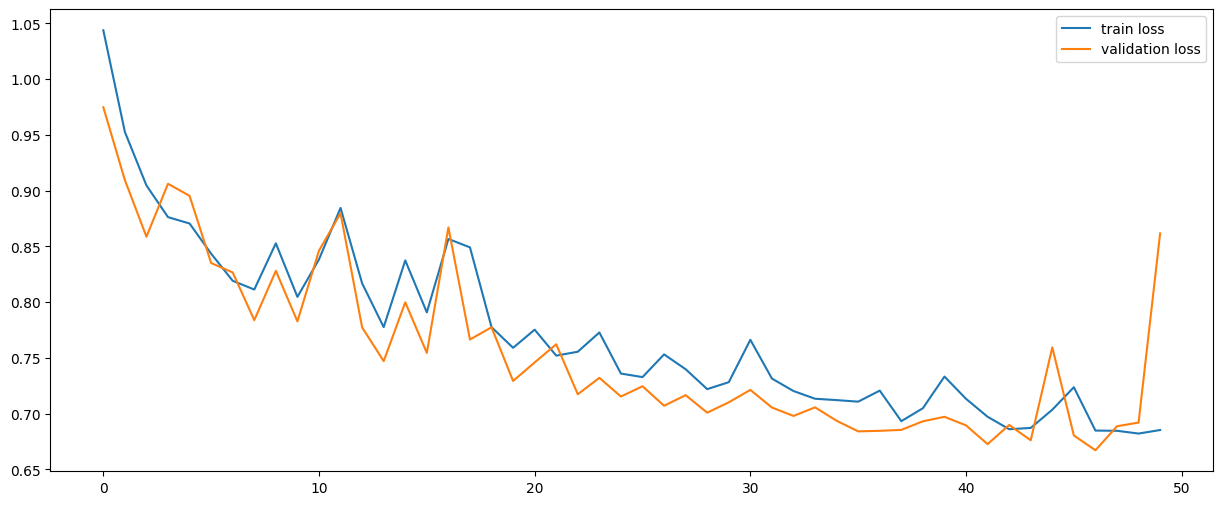

In [104]:
plt.figure(figsize=(15,6))
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='validation loss')
plt.legend()

In [105]:
state = torch.load('./best_val_model_pytorch.pt')
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.8841


In [106]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [107]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.8840780652181544
              precision    recall  f1-score   support

           0     0.8122    0.7830    0.7973     16096
           1     0.9108    0.9276    0.9191     19890
           2     0.9111    0.9204    0.9157     20992

    accuracy                         0.8841     56978
   macro avg     0.8781    0.8770    0.8774     56978
weighted avg     0.8831    0.8841    0.8835     56978



In [98]:
class_summary = df.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)


print(class_summary)

   Target_100  Count  Percent
0           0  28302    26.66
1           1  37937    35.73
2           2  39935    37.61


In [110]:
from models.mlp import MLP

mlp_model = MLP()
mlp_model.to(device)

MLP(
  (linear1): Linear(in_features=4000, out_features=128, bias=True)
  (leakyReLU): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=128, out_features=3, bias=True)
)

In [111]:
mlp_train_losses, mlp_val_losses = batch_gd(mlp_model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:02<01:45,  2.15s/it]

model saved
Epoch 1/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.148513, Best Val Epoch: 0


  4%|▍         | 2/50 [00:04<01:50,  2.30s/it]

Epoch 2/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.406450, Best Val Epoch: 0


  6%|▌         | 3/50 [00:06<01:45,  2.25s/it]

Epoch 3/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.198116, Best Val Epoch: 0


  8%|▊         | 4/50 [00:08<01:43,  2.24s/it]

Epoch 4/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.217426, Best Val Epoch: 0


 10%|█         | 5/50 [00:10<01:35,  2.13s/it]

Epoch 5/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:01.941351, Best Val Epoch: 0


 12%|█▏        | 6/50 [00:13<01:34,  2.14s/it]

Epoch 6/50, Train Loss: 1.1011,           Validation Loss: 1.1011, Duration: 0:00:02.147951, Best Val Epoch: 0


 14%|█▍        | 7/50 [00:15<01:37,  2.27s/it]

Epoch 7/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.539676, Best Val Epoch: 0


 16%|█▌        | 8/50 [00:17<01:34,  2.26s/it]

Epoch 8/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.241357, Best Val Epoch: 0


 18%|█▊        | 9/50 [00:20<01:31,  2.24s/it]

Epoch 9/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.204013, Best Val Epoch: 0


 20%|██        | 10/50 [00:22<01:28,  2.21s/it]

Epoch 10/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.118969, Best Val Epoch: 0


 22%|██▏       | 11/50 [00:24<01:25,  2.20s/it]

Epoch 11/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.201899, Best Val Epoch: 0


 24%|██▍       | 12/50 [00:26<01:24,  2.23s/it]

Epoch 12/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.278190, Best Val Epoch: 0


 26%|██▌       | 13/50 [00:28<01:22,  2.23s/it]

Epoch 13/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.226745, Best Val Epoch: 0


 28%|██▊       | 14/50 [00:31<01:20,  2.25s/it]

Epoch 14/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.289203, Best Val Epoch: 0


 30%|███       | 15/50 [00:33<01:17,  2.21s/it]

Epoch 15/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.120401, Best Val Epoch: 0


 32%|███▏      | 16/50 [00:35<01:15,  2.21s/it]

Epoch 16/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.215008, Best Val Epoch: 0


 34%|███▍      | 17/50 [00:37<01:11,  2.16s/it]

Epoch 17/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.037810, Best Val Epoch: 0


 36%|███▌      | 18/50 [00:39<01:04,  2.01s/it]

Epoch 18/50, Train Loss: 1.1011,           Validation Loss: 1.1011, Duration: 0:00:01.677943, Best Val Epoch: 0


 38%|███▊      | 19/50 [00:41<01:05,  2.10s/it]

Epoch 19/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.291675, Best Val Epoch: 0


 40%|████      | 20/50 [00:44<01:07,  2.26s/it]

Epoch 20/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.652844, Best Val Epoch: 0


 42%|████▏     | 21/50 [00:45<01:00,  2.08s/it]

Epoch 21/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:01.646418, Best Val Epoch: 0


 44%|████▍     | 22/50 [00:47<00:58,  2.08s/it]

Epoch 22/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.084706, Best Val Epoch: 0


 46%|████▌     | 23/50 [00:49<00:55,  2.04s/it]

Epoch 23/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:01.935119, Best Val Epoch: 0


 48%|████▊     | 24/50 [00:52<00:57,  2.20s/it]

Epoch 24/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.592307, Best Val Epoch: 0


 50%|█████     | 25/50 [00:54<00:57,  2.31s/it]

Epoch 25/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.541144, Best Val Epoch: 0


 52%|█████▏    | 26/50 [00:57<00:57,  2.38s/it]

Epoch 26/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.549817, Best Val Epoch: 0


 54%|█████▍    | 27/50 [00:59<00:52,  2.27s/it]

Epoch 27/50, Train Loss: 1.1015,           Validation Loss: 1.1011, Duration: 0:00:02.019664, Best Val Epoch: 0


 56%|█████▌    | 28/50 [01:01<00:48,  2.21s/it]

Epoch 28/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.051086, Best Val Epoch: 0


 58%|█████▊    | 29/50 [01:04<00:48,  2.29s/it]

Epoch 29/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.487271, Best Val Epoch: 0


 60%|██████    | 30/50 [01:05<00:41,  2.08s/it]

Epoch 30/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:01.582903, Best Val Epoch: 0


 62%|██████▏   | 31/50 [01:08<00:41,  2.17s/it]

Epoch 31/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.379359, Best Val Epoch: 0


 64%|██████▍   | 32/50 [01:10<00:39,  2.19s/it]

Epoch 32/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.224370, Best Val Epoch: 0


 66%|██████▌   | 33/50 [01:12<00:38,  2.25s/it]

Epoch 33/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.397927, Best Val Epoch: 0


 68%|██████▊   | 34/50 [01:15<00:36,  2.28s/it]

Epoch 34/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.334917, Best Val Epoch: 0


 70%|███████   | 35/50 [01:17<00:34,  2.31s/it]

Epoch 35/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.384897, Best Val Epoch: 0


 72%|███████▏  | 36/50 [01:19<00:30,  2.16s/it]

Epoch 36/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:01.810374, Best Val Epoch: 0


 74%|███████▍  | 37/50 [01:21<00:28,  2.19s/it]

Epoch 37/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.265367, Best Val Epoch: 0


 76%|███████▌  | 38/50 [01:23<00:24,  2.05s/it]

Epoch 38/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:01.710711, Best Val Epoch: 0


 78%|███████▊  | 39/50 [01:25<00:22,  2.06s/it]

Epoch 39/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.097886, Best Val Epoch: 0


 80%|████████  | 40/50 [01:27<00:20,  2.06s/it]

Epoch 40/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.040129, Best Val Epoch: 0


 82%|████████▏ | 41/50 [01:29<00:19,  2.13s/it]

Epoch 41/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.289672, Best Val Epoch: 0


 84%|████████▍ | 42/50 [01:32<00:17,  2.21s/it]

Epoch 42/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.395561, Best Val Epoch: 0


 86%|████████▌ | 43/50 [01:34<00:15,  2.19s/it]

Epoch 43/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.140023, Best Val Epoch: 0


 88%|████████▊ | 44/50 [01:36<00:13,  2.17s/it]

Epoch 44/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.139995, Best Val Epoch: 0


 90%|█████████ | 45/50 [01:38<00:10,  2.20s/it]

Epoch 45/50, Train Loss: 1.1011,           Validation Loss: 1.1011, Duration: 0:00:02.253262, Best Val Epoch: 0


 92%|█████████▏| 46/50 [01:40<00:08,  2.25s/it]

Epoch 46/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.366324, Best Val Epoch: 0


 94%|█████████▍| 47/50 [01:43<00:06,  2.24s/it]

Epoch 47/50, Train Loss: 1.1012,           Validation Loss: 1.1011, Duration: 0:00:02.223246, Best Val Epoch: 0


 96%|█████████▌| 48/50 [01:45<00:04,  2.19s/it]

Epoch 48/50, Train Loss: 1.1014,           Validation Loss: 1.1011, Duration: 0:00:02.076545, Best Val Epoch: 0


 98%|█████████▊| 49/50 [01:47<00:02,  2.18s/it]

Epoch 49/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.160872, Best Val Epoch: 0


100%|██████████| 50/50 [01:49<00:00,  2.19s/it]

Epoch 50/50, Train Loss: 1.1013,           Validation Loss: 1.1011, Duration: 0:00:02.108957, Best Val Epoch: 0


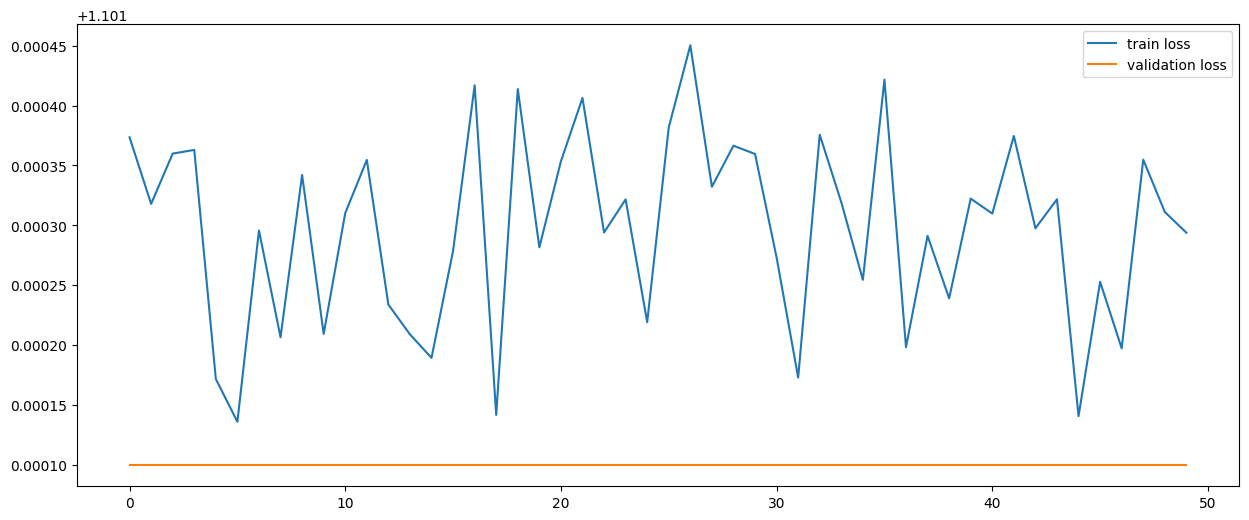

In [112]:
plt.figure(figsize=(15,6))
plt.plot(mlp_train_losses, label='train loss')
plt.plot(mlp_val_losses, label='validation loss')
plt.legend()

In [115]:
state = torch.load('./best_val_model_pytorch.pt')
model = MLP()
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.3468


In [116]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [117]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.3468180701323318
              precision    recall  f1-score   support

           0     0.3155    0.0520    0.0893     16096
           1     0.3485    0.9302    0.5070     19890
           2     0.3439    0.0201    0.0380     20992

    accuracy                         0.3468     56978
   macro avg     0.3360    0.3341    0.2114     56978
weighted avg     0.3375    0.3468    0.2162     56978

